### PREGUNTAS

QUÉ LE OFREZCO A MI PÚBLICO OBJETIVO

- seleccionar rol: Data Analist, Business Analist

- con qué trabajan esos roles: herramientas de visualizacion, de graficas, notebooks, bases de datos relacionales y no relacionales, lenguajes de programación.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [64]:
df_adalab_limpio = pd.read_csv('data/df_adalab_limpio.csv', index_col = 'index')
df_da= pd.read_csv('data/df_da.csv', index_col = 'index')
df_da_europa= pd.read_csv('data/df_da_europa.csv', index_col = 'index')
df_notebooks = pd.read_csv('data/df_notebooks.csv', index_col = 'index')
df_languages = pd.read_csv('data/df_languages.csv', index_col = 'index')
df_learn = pd.read_csv('data/df_learn.csv', index_col = 'index')
df_viz = pd.read_csv('data/df_viz.csv', index_col = 'index')
df_share = pd.read_csv('data/df_share.csv', index_col = 'index')
df_code_env = pd.read_csv('data/df_code_env.csv', index_col = 'index')
df_courses = pd.read_csv('data/df_courses.csv', index_col = 'index')
df_da_publi = pd.read_csv('data/df_da_publi.csv', index_col = 'index')

In [3]:
lista_df = [df_languages, df_viz, df_code_env, df_notebooks, df_share, df_learn, df_courses]
lista_titulos = ["Lenguajes de programación", "Librerías de visualización", "Ambientes de Desarrollo de Código", "Productos de Alojamiento de Notebooks", "Plataformas para compartir proyectos", "Productos de Big Data medio plazo", "Plataformas de formación"]

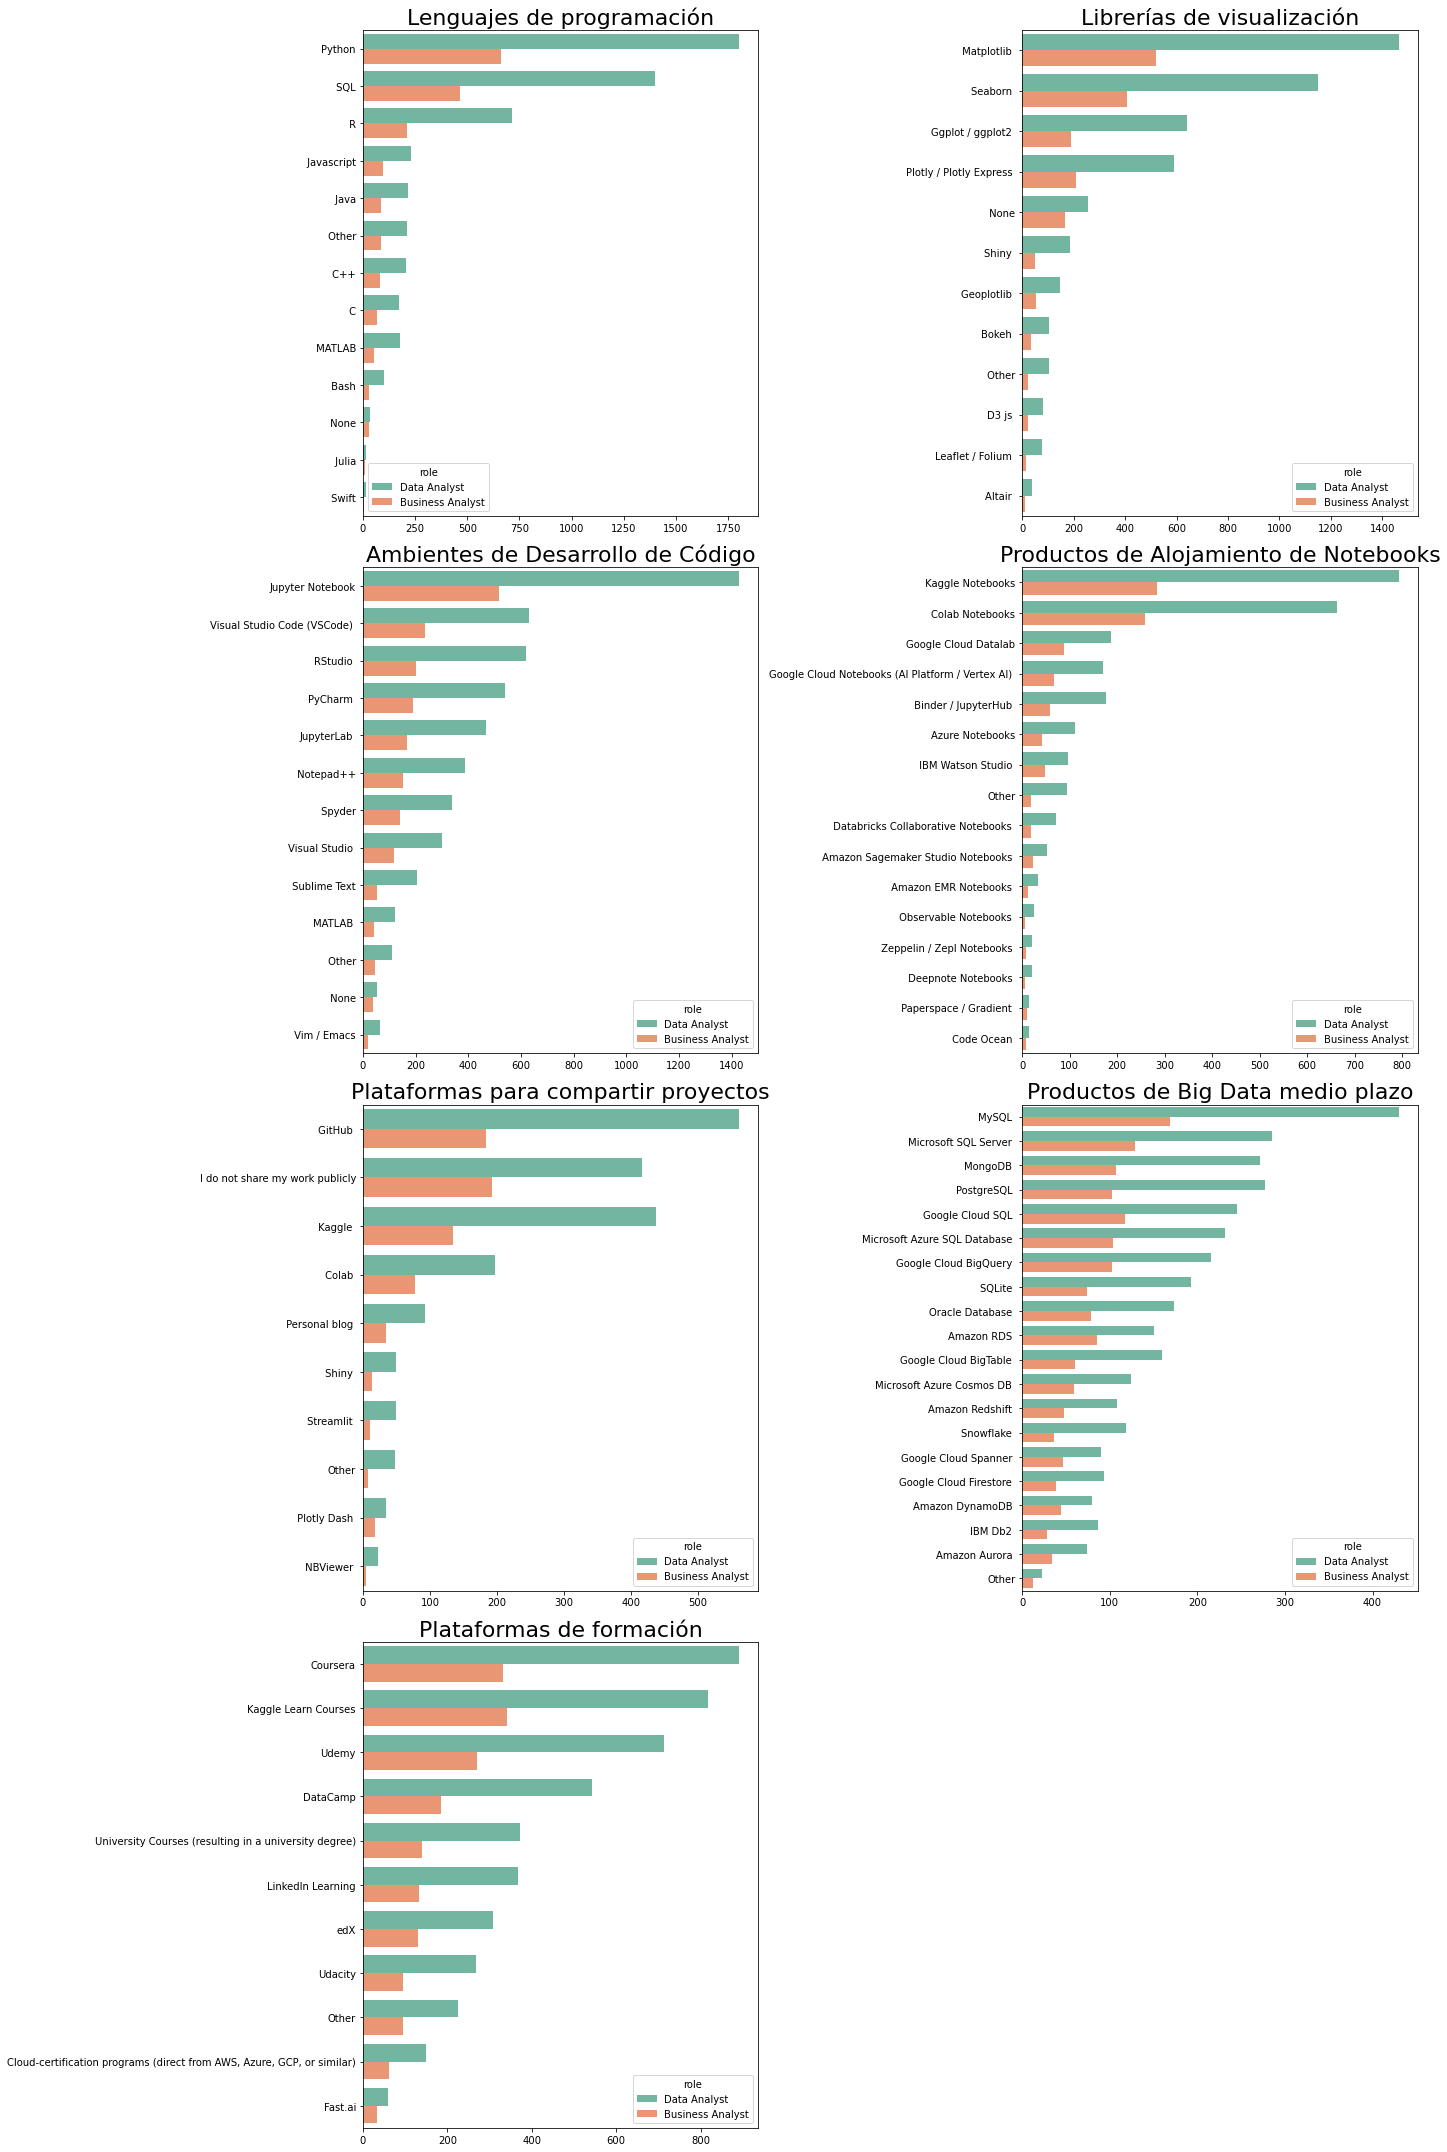

In [88]:
fig, axes = plt.subplots (4, 2, figsize = (20, 30))

axes = axes.flat 

for indice, df in enumerate(lista_df):
    columna = df.columns[-1]
    orden = df[columna].value_counts().index #sacamos el índice de las columnas, ordenando sus valores de mayor a menor 
    sns.countplot( y = columna, data = df, hue = "role", order = orden, ax = axes[indice], palette= "Set2") 
    for ind, titulo in enumerate (lista_titulos):
        axes[ind].set_title(titulo, size= 22)
        axes[ind].set(xlabel= '', ylabel = '')

plt.tight_layout()
fig.delaxes(axes[-1]);

CÓMO LLEGO A MI PÚBLICO OBJETIVO
- ¿Hay poco porcentaje de mujeres en el sector tecnológico? ¿Esto está relacionado con el país que analizamos (global, europero, español)? **Resuelto con gráfica
- Salario de Data analist y Bussines Analyst (en función de la experiencia). Brecha de género.
- Analizar el nivel de estudios y el sector del que vienen las mujeres que trabajan en DA o BA.

In [5]:
df_publicidad = pd.read_csv('data/df_publicidad.csv')

df_publicidad.head(2)

,index,age,gender,country,education,role,prog_language,code_env,notebook_kaggle,notebook_colab,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_OTHER,cat_experience
0,8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,"Python, SQL",Other,Kaggle Notebooks,Colab Notebooks,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,Mid
1,35,30-34,Woman,Brazil,Bachelor’s degree,Currently not employed,"Python, R, SQL","JupyterLab ,RStudio ,PyCharm ,Jupyter Notebook",Kaggle Notebooks,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior


In [6]:
col_media = ['media_Twitter', 'media_Email', 'media_Reddit', 'media_Kaggle', 'media_Forums', 'media_YouTube', 'media_Podcasts', 'media_Blogs', 'media_Journal', 'media_Slack', 'media_OTHER']

In [7]:
def unir(col):
    lista_valores = []
    for element in col:
        if str(element) != "nan":
            lista_valores.append(str(element))
        else:
            pass
    return lista_valores

In [8]:
df_publicidad['media_unido'] = df_publicidad[col_media].apply(unir, axis=1)

In [9]:
sociodemo_media = df_publicidad[["gender", "country", "education", "role", "media_unido"]]
df_media = sociodemo_media.explode(["media_unido"])
df_media.sample(2)

,gender,country,education,role,media_unido
1409,Man,Russia,Bachelor’s degree,Currently not employed,"Slack Communities (ods.ai, kagglenoobs, etc)"
1720,Man,Chile,Master’s degree,Student,"YouTube (Kaggle YouTube, Cloud AI Adventures, ..."


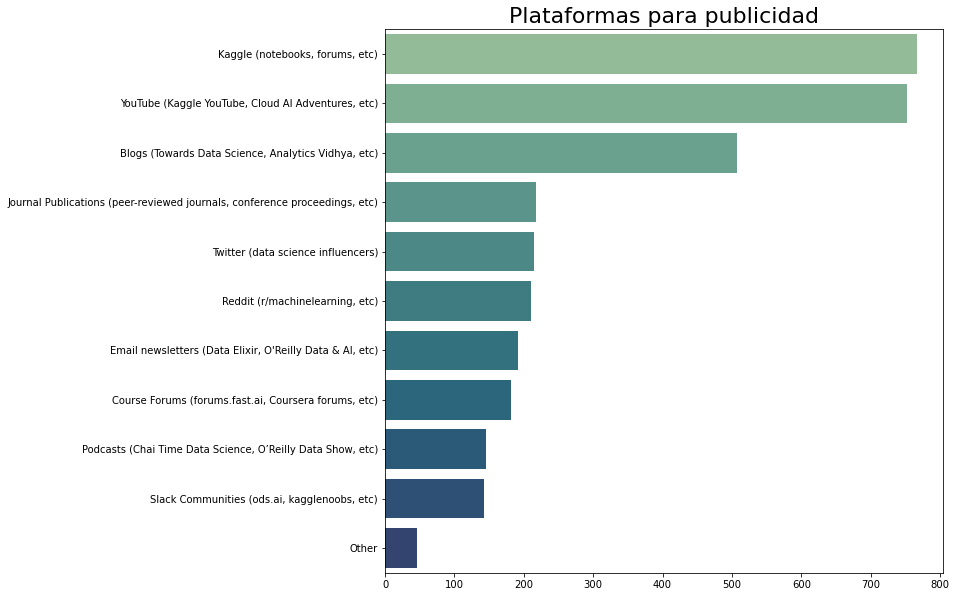

In [118]:
orden = df_media["media_unido"].value_counts().index

plt.figure(figsize = (10, 10))
sns.countplot(y = "media_unido", data = df_media, order = orden, palette= "crest")
plt.title("Plataformas para publicidad", size= 22)
plt.xlabel("")
plt.ylabel("");

In [12]:
df_genero = df_da_publi['gender'].value_counts().reset_index()
df_genero

,gender,count
0,Man,605
1,Woman,121
2,Prefer not to say,4
3,Prefer to self-describe,2


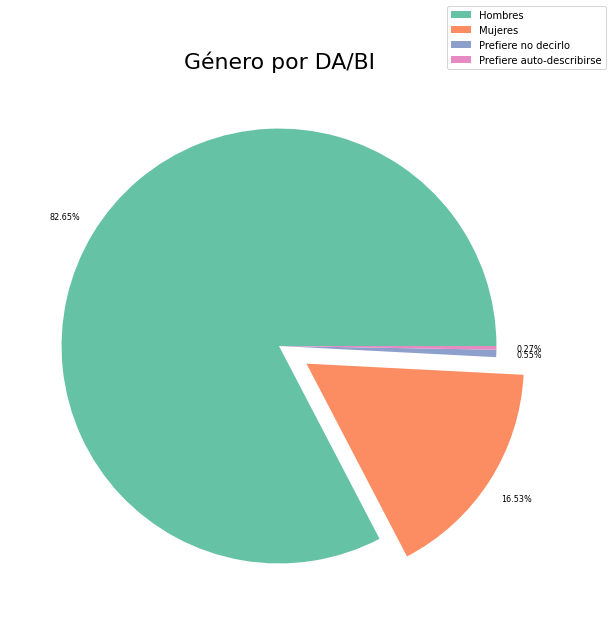

In [14]:

data = [605, 121, 4, 2]
keys = ["Hombres", "Mujeres", "Prefiere no decirlo", "Prefiere auto-describirse"]
explode = (0, 0.15, 0, 0)
palette_color = sns.color_palette("Set2")

plt.figure(figsize= (10, 10))
plt.pie(data, explode = explode,  colors =  palette_color, autopct='%1.2f%%', pctdistance = 1.15, textprops= {'color': 'black', 'fontsize' : 8})
plt.title("Género por DA/BI", fontsize = 22) 
plt.legend(bbox_to_anchor=(0.8, 1), labels = keys)
plt.show();

In [22]:
df_da_europa.sample()

,age,gender,country,education,role,prog_language,code_env,notebook_kaggle,notebook_colab,notebook_azure,...,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_OTHER,cat_experience,cat_salary
index,,,,,,,,,,,,,,,,,,,,,
17320,25-29,Man,Netherlands,Master’s degree,Data Analyst,"Python, R, SQL","RStudio ,PyCharm ,Jupyter Notebook",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Senior,20K - 50K


In [95]:
df_da_publi.groupby("gender")["education"].value_counts()

gender                   education                                                        
Man                      Master’s degree                                                      305
                         Bachelor’s degree                                                    174
                         Some college/university study without earning a bachelor’s degree     51
                         Doctoral degree                                                       41
                         I prefer not to answer                                                17
                         No formal education past high school                                  13
                         Professional doctorate                                                 4
Prefer not to say        Master’s degree                                                        2
                         Doctoral degree                                                        1
                         So

In [93]:
df_da_publi.sample(5)

,age,gender,country,education,role,prog_language,code_env,notebook_kaggle,notebook_colab,notebook_azure,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_OTHER,cat_experience
index,,,,,,,,,,,,,,,,,,,,,
22642,50-54,Man,Russia,Master’s degree,Data Analyst,"Python, R, SQL, C, C++, Java, Javascript","RStudio ,PyCharm , Spyder, Sublime Text,Jupyte...",NaN,NaN,NaN,...,"Reddit (r/machinelearning, etc)","Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,Senior+
4366,25-29,Man,Colombia,Bachelor’s degree,Data Analyst,"Python, R, SQL, MATLAB","RStudio ,Visual Studio ,Jupyter Notebook",NaN,Colab Notebooks,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior
15770,30-34,Man,Russia,Master’s degree,Data Analyst,"Python, SQL, Other","Notepad++,Jupyter Notebook",NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,Mid
2039,40-44,Woman,Argentina,Master’s degree,Data Analyst,"Python, SQL","RStudio ,Visual Studio",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior
2008,22-24,Man,Mexico,Some college/university study without earning ...,Data Analyst,"Python, R, Julia, MATLAB","RStudio , Spyder, Vim / Emacs,Jupyter Notebook",Kaggle Notebooks,Colab Notebooks,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior


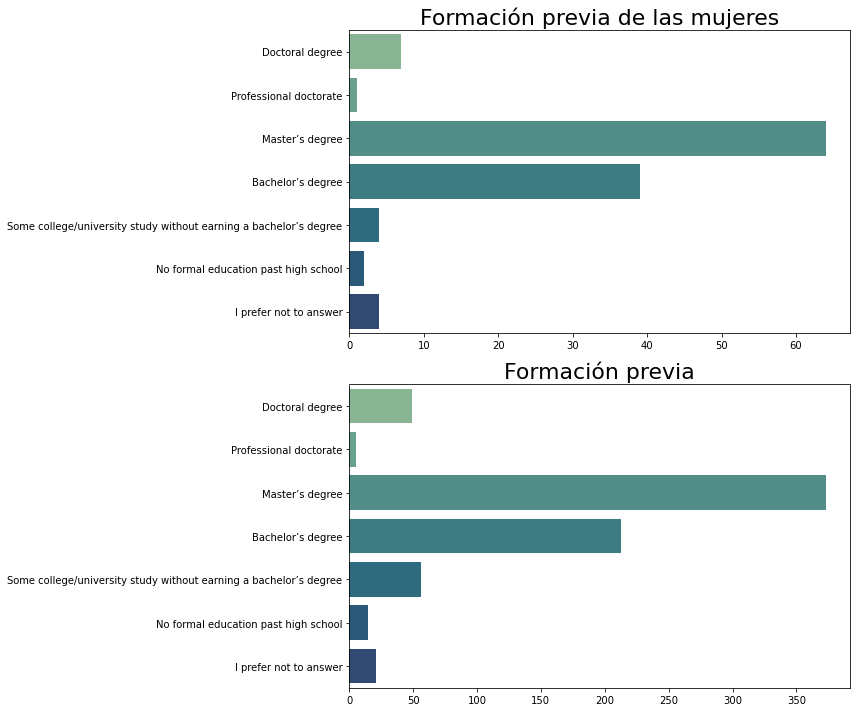

In [119]:

orden= ['Doctoral degree', 'Professional doctorate', 'Master’s degree', 'Bachelor’s degree',
       'Some college/university study without earning a bachelor’s degree',
       'No formal education past high school', 'I prefer not to answer',]



fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(y="education", data=df_da_publi[df_da_publi["gender"] == "Woman"], order = orden, palette="crest", ax=axes[0])
axes[0].set_title("Formación previa de las mujeres", size=22)
axes[0].set(xlabel='', ylabel='')


sns.countplot(y="education", data=df_da_publi, order = orden, palette="crest", ax=axes[1])
axes[1].set_title("Formación previa", size=22)
axes[1].set(xlabel='', ylabel='')

plt.tight_layout() 
plt.show()



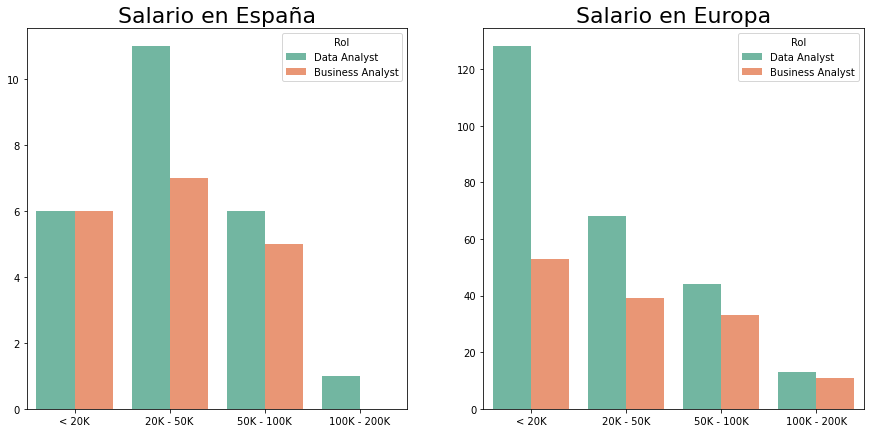

In [116]:
fig, axes = plt.subplots (1, 2, figsize = (15, 7))

orden = ['< 20K', '20K - 50K', '50K - 100K', '100K - 200K'] 

sns.countplot( x = "cat_salary", data = df_da_europa[df_da_europa["country"] == "Spain"], hue = "role", ax = axes[0], order = orden, palette= "Set2") ;
sns.countplot( x = "cat_salary", data = df_da_europa, ax = axes[1],  hue = "role", order = orden,palette= "Set2") ;
axes[0].set_title("Salario en España", size= 22)
axes[0].set(xlabel= '', ylabel = '')
axes[1].set_title("Salario en Europa", size= 22)
axes[1].set(xlabel= '', ylabel = '')
axes[0].legend(title = "Rol")
axes[1].legend(title = "Rol")


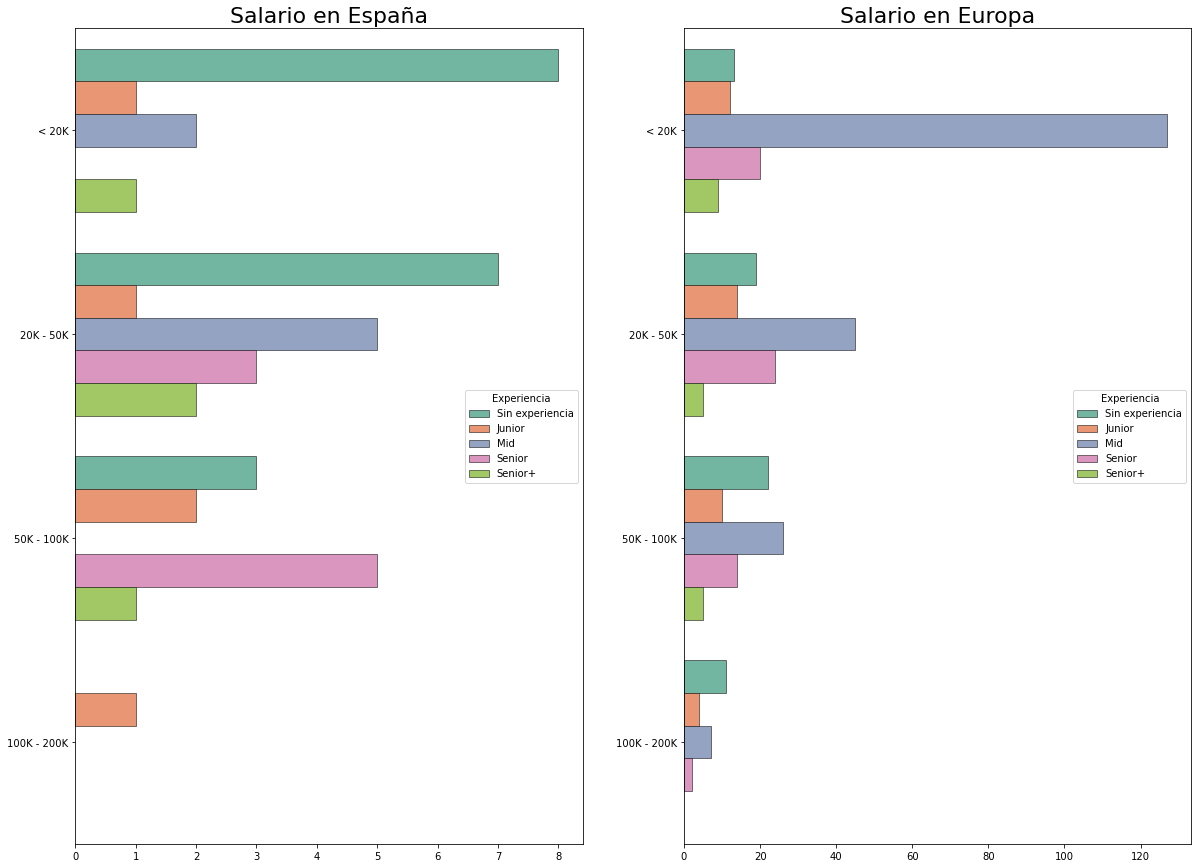

In [63]:
fig, axes = plt.subplots (1, 2, figsize = (20, 15))

orden = ['< 20K', '20K - 50K', '50K - 100K', '100K - 200K'] 
orden_labels = ["Sin experiencia", "Junior", "Mid", "Senior", "Senior+"]

sns.countplot( y = "cat_salary", data = df_da_europa[df_da_europa["country"] == "Spain"], hue = "cat_experience", ax = axes[0], order = orden, linewidth= 0.5, edgecolor="black",palette= "Set2") ;
sns.countplot( y = "cat_salary", data = df_da_europa, ax = axes[1],  hue = "cat_experience", order = orden, linewidth= 0.5, edgecolor="black", palette = "Set2", ) ;
axes[0].set_title("Salario en España", size= 22)
axes[0].set(xlabel= '', ylabel = '')
axes[1].set_title("Salario en Europa", size= 22)
axes[1].set(xlabel= '', ylabel = '')
axes[0].legend(labels = orden_labels, title = "Experiencia")
axes[1].legend(labels = orden_labels, title = "Experiencia")

In [75]:
df_da["BI_tools"].value_counts()

BI_tools
Microsoft Power BI          232
Tableau                     209
Google Data Studio           52
Qlik                         24
Other                        16
SAP Analytics Cloud          13
Tableau CRM                  13
Salesforce                   10
Alteryx                      10
Amazon QuickSight             8
Microsoft Azure Synapse       6
Looker                        5
TIBCO Spotfire                4
Domo                          3
Sisense                       1
Name: count, dtype: int64

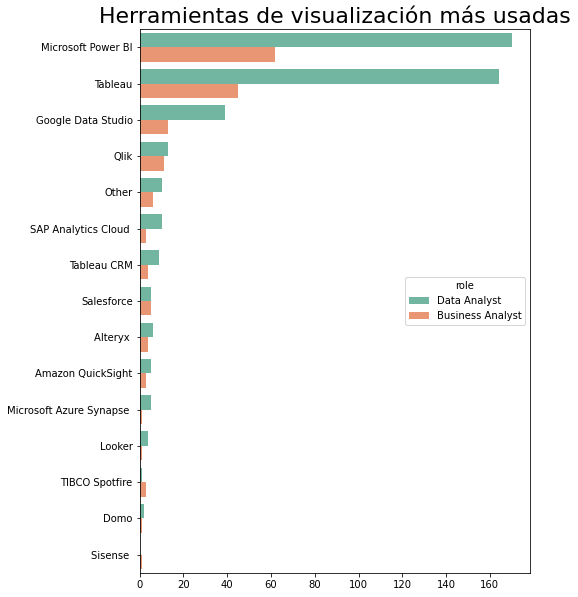

In [91]:
orden = df_da["BI_tools"].value_counts().index

plt.figure(figsize = (7,10))
sns.countplot(y = "BI_tools", hue = "role", data = df_da, order = orden, palette= "Set2")
plt.title("Herramientas de visualización más usadas", size= 22)
plt.xlabel("")
plt.ylabel("");